In [2]:
import numpy as np
from numpy import linalg as LA
from scipy.optimize import root
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import csv
import pandas as pd
from scipy.stats import norm

# define matplotlib style
mpl.style.use("classic")
mpl.rc("xtick", labelsize=15)
mpl.rc("ytick", labelsize=15)
mpl.rc("xtick.major", size=14, width=2)
mpl.rc("xtick.minor", size=7, width=2, visible=True)
mpl.rc("ytick.major", size=14, width=2)
mpl.rc("ytick.minor", size=7, width=2, visible=True)
mpl.rc("lines", linewidth=2, markersize=5)
mpl.rc("axes", linewidth=2, labelsize=15, labelpad=2.5)
mpl.rc("legend", fontsize=15, loc="best", frameon=True, numpoints=1)

mpl.rc("font", family="STIXGeneral")
mpl.rc("mathtext", fontset="stix")
mpl.rc("axes", titlesize=20, titlepad=10)

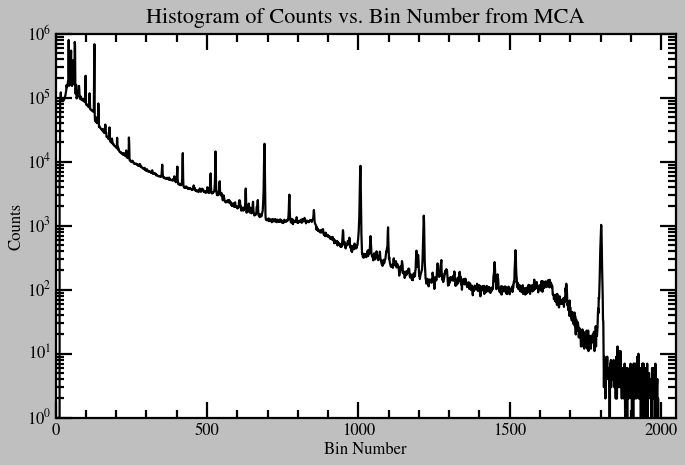

In [17]:
import matplotlib.pyplot as plt
import numpy as np

counts = []
with open('uranium.spe', 'r') as f:
    in_data = False
    for line in f:
        if line.startswith('$DATA:'):
            in_data = True
            continue
        # The next line after "$DATA:" sometimes gives the bin range (e.g., "0 2047")
        if in_data and line.strip().startswith('0 '):
            continue
        if in_data:
            # Stop if you hit another section marker (e.g., "$ROI:")
            if line.startswith('$'):
                break
            try:
                counts.append(float(line.strip()))
            except ValueError:
                pass

# Now plot the histogram as above.
bins = np.arange(len(counts))
plt.figure(figsize=(10, 6))
plt.plot(bins, counts, color='black')
plt.xlabel('Bin Number')
plt.ylabel('Counts')
plt.yscale('log')
plt.xlim(0, len(counts))
plt.title('Histogram of Counts vs. Bin Number from MCA')
plt.savefig('uranium_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()